# Reading MusicXML
- Original code by FMP notebook (https://www.audiolabs-erlangen.de/resources/MIR/FMP/C1/C1S2_MusicXML.html)

In [1]:
import os
import sys

import pretty_midi
import pandas as pd
import IPython.display as ipd
import libfmp.c1
import music21 as m21

In [2]:
xml_file = os.path.join('./', 'MusicXML', 'midi_076.musicxml')

In [3]:
with open(xml_file, 'r', encoding="utf8") as stream:
    xml_str = stream.read()

In [4]:
start = xml_str.find('<note')
end = xml_str[start:].find('</note>') + start + len('</note>')
print (xml_str[start:end])

<note default-x="123.48" default-y="-40.00">
        <pitch>
          <step>E</step>
          <octave>4</octave>
          </pitch>
        <duration>2</duration>
        <voice>1</voice>
        <type>quarter</type>
        <stem>up</stem>
        <staff>1</staff>
        </note>


In [5]:
def xml_to_list(xml):
    """Args:
        xml (str or music21.stream.Score): Either a path to a music xml file or a music21.stream.Score

    Returns:
        score (list): A list of note events where each note is specified as
            ``[start, duration, pitch, velocity, label]``
    """
    if isinstance(xml, str): 
        xml_data = m21.converter.parse(xml) # The m21 returns being the class 'm21.stream Score'
    elif isinstance(xml, m21.stream.Score):
        xml_data = xml
    else:
        raise RuntimeError('midi must be a path to a midi file or music21.stream.Score')
    
    score = []
    
    for part in xml_data.parts:
        instrument = part.getInstrument().instrumentName
        print (f'Instrument : {instrument}')
        
        for note in part.flat.notes:
            print (note)
            
            if note.isChord: #It can be both isChord and isNote:
                start = note.offset #neasured by musical note
                print (f'Start : {start}')
                duration = note.quarterLength #beat of musical note
                print (f'Duration : {duration}')
                
                for chord_note in note.pitches:
                    pitch = chord_note.ps
                    print (f'Pitch : {pitch}')
                    volume = note.volume.realized
                    print (f'Volume : {volume}')
                    score.append([start, duration, pitch, volume, instrument])
                    
            else:
                start = note.offset
                duration = note.quarterLength
                pitch = note.pitch.ps
                volume = note.volume.realized
                score.append([start, duration, pitch, volume, instrument])
                
    score = sorted(score, key=lambda x: (x[0], x[2]))
    
    return score

In [6]:
xml_data = m21.converter.parse(xml_file)
xml_list = xml_to_list(xml_data)

Instrument : Piano
<music21.note.Note E>
<music21.note.Note F#>
<music21.note.Note A>
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note B>
<music21.note.Note E>
<music21.note.Note F#>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note A>
<music21.note.Note E>
<music21.note.Note F#>
<music21.note.Note A>
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note B>
<music21.note.Note E>
<music21.note.Note F#>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note C#>
<music21.note.Note B>
<music21.note.Note A>
<music21.note.Note A>
<music21.note.Note E>
<music21.note.Note F#>
<music21.note.Note A>
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note B>
<music21.note.Note E>
<music21.note.Note F#>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note A>
<music21.note.Note E>
<music21.note.Note F#>
<music21.note.Note A>

In [7]:
df = pd.DataFrame(xml_list, columns=['Start', 'End', 'Pitch', 'Velocity', 'Instrument'])

In [8]:
df

,Start,End,Pitch,Velocity,Instrument
0,0.0,1.0,64.0,0.70866,Piano
1,1.0,1.0,66.0,0.70866,Piano
2,2.0,1.0,69.0,0.70866,Piano
3,3.0,4.0,47.0,0.70866,Piano
4,3.0,4.0,50.0,0.70866,Piano
...,...,...,...,...,...
101,62.5,0.5,69.0,0.70866,Piano
102,63.0,4.0,54.0,0.70866,Piano
103,63.0,4.0,57.0,0.70866,Piano
104,63.0,4.0,61.0,0.70866,Piano


(<Figure size 576x216 with 1 Axes>,
 <AxesSubplot:xlabel='Time (quarter lengths)', ylabel='Pitch'>)

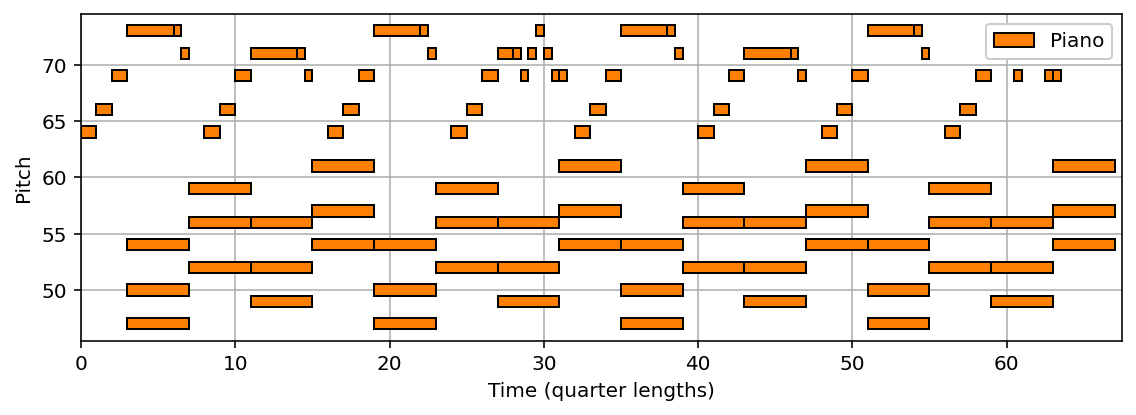

In [9]:
libfmp.c1.visualize_piano_roll(xml_list, figsize=(8,3), velocity_alpha=False, xlabel='Time (quarter lengths)')